dendrogram 

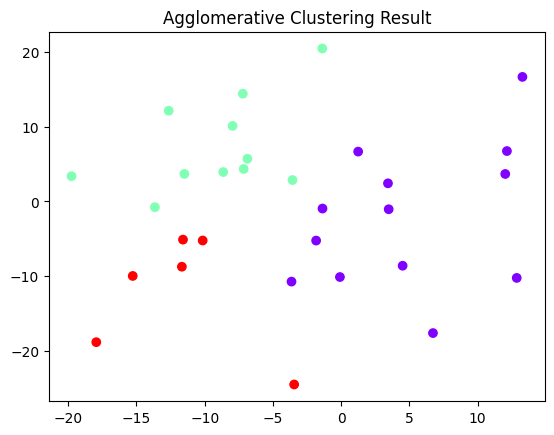

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=30, centers=3, random_state=42, cluster_std=10)

# Perform Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=3)
labels = clustering.fit_predict(X)

# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("Agglomerative Clustering Result")
plt.show()
